# Analyze Kennicott and Root Glacier 2D driving stress


In [1]:
### imports ###
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from raster_basics.RasterBasics import rasterMath, rasterLike, tifReprojectionResample


In [2]:
# create funciton to calculate driving stress for a vector containing thickness values
def grav_driving_stress(slope, thick, rho_ice = 900, g = 9.81):
    """
    Compute driving stress at glacier bed

    Parameters
    ----------
    slope : float
      ndarray or list containing surface slope values in degrees
    thick : float
      ndarray or list containing ice thickness values in meters
    rho_ice : float
      constant ice density in kg/m^3
    g : float
      constant gravitational acceleration in m/s^2

    Returns
    -------
    tau_b : float
      ndarray containing driving stress as the product of the input parameters. Units = [m][kg/m^3][m/s^2] = [N][m^-2] = [Pa]
    """
    slope = np.asarray(slope)
    thick = np.asarray(thick)
    if slope.shape != thick.shape:
        print("Slope and thickness arrays must be of the same length")
        return None

    return rho_ice * g * thick * np.sin(np.deg2rad(slope))


# function to get slope from DEM
def surface_slope(elev_array, cellsize):
    """
    Compute surface slope in degrees form a DEM

    Parameters
    ----------
    elev_array : float
      ndarray containing surface elevation values in meters
    cellsize : int or float
      cell size in meters

    Returns
    -------
    slope_array : float
      ndarray containing computed surface slopes in degrees
    """
    # Evaluate gradient in two dimensions
    px, py = np.gradient(elev_array, cellsize)
    slope = np.sqrt(px ** 2 + py ** 2)

    # convert slope in degrees
    return  np.degrees(np.arctan(slope))


In [3]:
# parameters for gaussian filter
sigma = 2


In [4]:
# bed data
bedpath_ds = '/path/to/bed.tif'


Calculate driving stress for each DEM
- make sure DEMs have the same resolution and extent
  

In [5]:
### 1957 DEM ###
# sample surface height and slope, also subtract bed height to get ice thickness, then calculate driving stress
dempath_1957 = '/path/to/coregistered_1957_dem.tif'
slppath_1957 = './1957_slp_tmp.tif'
dem_1957 = rio.open(dempath_1957).read(1)

# apply gaussian filter to dem before getting slope
filtered_dem_1957 = gaussian_filter(dem_1957, sigma=sigma, mode='nearest')
slope_1957 = surface_slope(filtered_dem_1957, cellsize=rio.open(dempath_1957).res[0])
thickness_1957 = rasterMath(bedpath_ds, dempath_1957, '-r')

# save slope to same extent as thickness
rasterLike(slope_1957, slppath_1957, dempath_1957)
tifReprojectionResample(slppath_1957, slppath_1957, crs=rio.open(bedpath_ds).crs, res=rio.open(bedpath_ds).res[0],
                        interp=rio.warp.Resampling.cubic_spline, extent_file=bedpath_ds, fill_val=None)
slope_1957 = rio.open(slppath_1957).read(1)

# filter out values
dem_1957[dem_1957 < 0] = np.nan
rasterLike(dem_1957, dempath_1957, dempath_1957)
slope_1957[slope_1957 >= 90] = np.nan
rasterLike(slope_1957, slppath_1957, slppath_1957)

# calculate driving stress
tau_b_1957 = grav_driving_stress(slope_1957, thickness_1957)


In [6]:
### 1978 DEM ###
# sample surface height and slope, also subtract bed height to get ice thickness, then calculate driving stress
dempath_1978 = '/path/to/coregistered_1978_dem.tif'
slppath_1978 = './1978_slp_tmp.tif'
dem_1978 = rio.open(dempath_1978).read(1)

# apply gaussian filter to dem before getting slope
filtered_dem_1978 = gaussian_filter(dem_1978, sigma=sigma, mode='nearest')
slope_1978 = surface_slope(filtered_dem_1978, cellsize=rio.open(dempath_1978).res[0])
thickness_1978 = rasterMath(bedpath_ds, dempath_1978, '-r')

# save slope to same extent as thickness
rasterLike(slope_1978, slppath_1978, dempath_1978)
tifReprojectionResample(slppath_1978, slppath_1978, crs=rio.open(bedpath_ds).crs, res=rio.open(bedpath_ds).res[0],
                        interp=rio.warp.Resampling.cubic_spline, extent_file=bedpath_ds, fill_val=None)
slope_1978 = rio.open(slppath_1978).read(1)

# filter out values
dem_1978[dem_1978 < 0] = np.nan
rasterLike(dem_1978, dempath_1978, dempath_1978)
slope_1978[slope_1978 >= 90] = np.nan
rasterLike(slope_1978, slppath_1978, slppath_1978)

# calculate driving stress
tau_b_1978 = grav_driving_stress(slope_1978, thickness_1978)


In [17]:
### ASTER 2004 DEM ###
dempath_2004 = '/path/to/coregistered_2004_dem.tif'
slppath_2004 = './2004_slp_tmp.tif'
dem_2004 = rio.open(dempath_2004).read(1)

# apply gaussian filter to dem before getting slope
filtered_dem_2004 = gaussian_filter(dem_2004, sigma=sigma, mode='nearest')
slope_2004 = surface_slope(filtered_dem_2004, cellsize=rio.open(dempath_2004).res[0])
thickness_2004 = rasterMath(bedpath_ds, dempath_2004, '-r')

# save slope to same extent as thickness
rasterLike(slope_2004, slppath_2004, dempath_2004)
tifReprojectionResample(slppath_2004, slppath_2004, crs=rio.open(bedpath_ds).crs, res=rio.open(bedpath_ds).res[0],
                        interp=rio.warp.Resampling.cubic_spline, extent_file=bedpath_ds, fill_val=None)
slope_2004 = rio.open(slppath_2004).read(1)

# filter out values
dem_2004[dem_2004 < 0] = np.nan
rasterLike(dem_2004, dempath_2004, dempath_2004)
slope_2004[slope_2004 >= 90] = np.nan
rasterLike(slope_2004, slppath_2004, slppath_2004)

# calculate driving stress
tau_b_2004 = grav_driving_stress(slope_2004, thickness_2004)


In [8]:
### IFSAR 2012 DEM ###
dempath_2012 = '/path/to/2012_dem.tif'
dem_2012 = rio.open(dempath_2012).read(1)
slppath_2012 = './ifsar_slp_tmp.tif'

# apply gaussian filter to dem before getting slope
filtered_dem_2012 = gaussian_filter(dem_2012, sigma=sigma, mode='nearest')
slope_2012 = surface_slope(filtered_dem_2012, cellsize=rio.open(dempath_2012).res[0])
thickness_2012 = rasterMath(bedpath_ds, dempath_2012, '-r')

# save slope to same extent as thickness
rasterLike(slope_2012, slppath_2012, dempath_2012)
tifReprojectionResample(slppath_2012, slppath_2012, crs=rio.open(bedpath_ds).crs, res=rio.open(bedpath_ds).res[0],
                        interp=rio.warp.Resampling.cubic_spline, extent_file=bedpath_ds, fill_val=None)
slope_2012 = rio.open(slppath_2012).read(1)

# filter out values
dem_2012[dem_2012 < 0] = np.nan
rasterLike(dem_2012, dempath_2012, dempath_2012)
slope_2012[slope_2012 >= 90] = np.nan
rasterLike(slope_2012, slppath_2012, slppath_2012)

# calculate driving stress
tau_b_2012 = grav_driving_stress(slope_2012, thickness_2012)


In [9]:
### NPS 2023 DEM ###
# sample surface height and slope, also subtract bed height to get ice thickness, then calculate driving stress
dempath_2023 = '/path/to/coregistered_2023_dem.tif'
dem_2023 = rio.open(dempath_2023).read(1)
slppath_2023 = './nps23_slp_tmp.tif'

# apply gaussian filter to dem before getting slope
filtered_dem_2023 = gaussian_filter(dem_2023, sigma=sigma, mode='nearest')
slope_2023 = surface_slope(filtered_dem_2023, cellsize=rio.open(dempath_2023).res[0])
thickness_2023 = rasterMath(bedpath_ds, dempath_2023, '-r')

# save slope to same extent as thickness
rasterLike(slope_2023, slppath_2023, dempath_2023)
tifReprojectionResample(slppath_2023, slppath_2023, crs=rio.open(bedpath_ds).crs, res=rio.open(bedpath_ds).res[0],
                        interp=rio.warp.Resampling.cubic_spline, extent_file=bedpath_ds, fill_val=None)
slope_2023 = rio.open(slppath_2023).read(1)

# filter out values
dem_2023[dem_2023 < 0] = np.nan
rasterLike(dem_2023, dempath_2023, dempath_2023)
slope_2023[slope_2023 >= 90] = np.nan
rasterLike(slope_2023, slppath_2023, slppath_2023)

# calculate driving stress
tau_b_2023 = grav_driving_stress(slope_2023, thickness_2023)


Filter 2D driving stress files

In [18]:
# remove off-glacier pixels
thickness_1957[(thickness_1957 > 2000) | (thickness_1957 <= 0)] = np.nan
thickness_1978[(thickness_1978 > 2000) | (thickness_1978 <= 0)] = np.nan
thickness_2004[(thickness_2004 > 2000) | (thickness_2004 <= 0)] = np.nan
thickness_2012[(thickness_2012 > 2000) | (thickness_2012 <= 0)] = np.nan
thickness_2023[(thickness_2023 > 2000) | (thickness_2023 <= 0)] = np.nan

tau_b_1957[np.isnan(thickness_1957)] = np.nan
tau_b_1978[np.isnan(thickness_1978)] = np.nan
tau_b_2004[np.isnan(thickness_2004)] = np.nan
tau_b_2012[np.isnan(thickness_2012)] = np.nan
tau_b_2023[np.isnan(thickness_2023)] = np.nan


Plot the 2D driving stress

In [15]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'


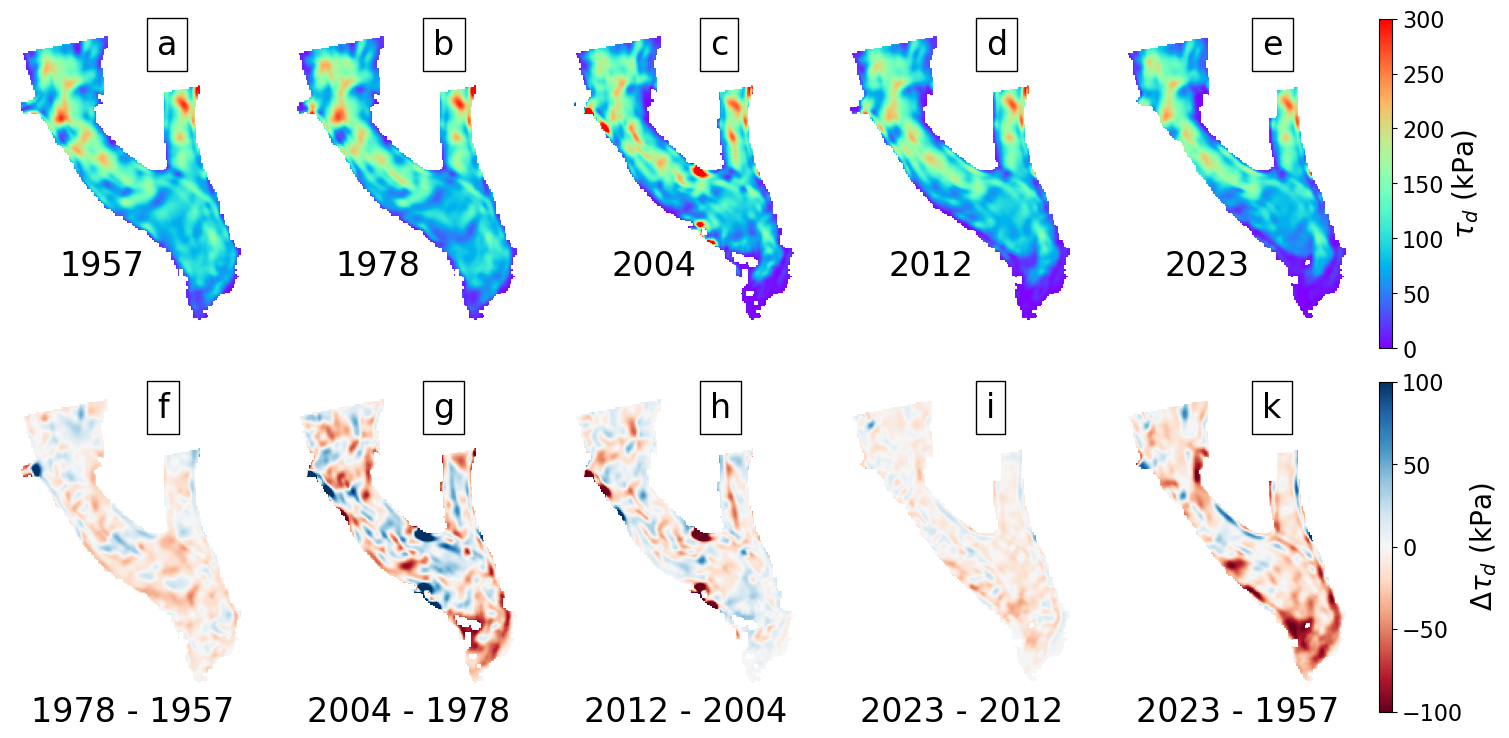

In [19]:
fig, ax = plt.subplot_mosaic(
    """
    AABBCCDDEEF
    GGHHIIJJKKL
    """,
    gridspec_kw={"height_ratios": [2, 2], "width_ratios": [1,1,1,1,1,1,1,1,1,1,0.1],
                 "wspace": 0.05, "hspace": 0.1}, figsize=(18, 9))
axs_top = ['A', 'B', 'C', 'D', 'E']
axs_bot = ['G', 'H', 'I', 'J', 'K']
labels_top = ['a', 'b', 'c', 'd', 'e']
labels_bot = ['f', 'g', 'h', 'i', 'k']

# get data
tau_b = [tau_b_1957, tau_b_1978, tau_b_2004, tau_b_2012, tau_b_2023] # driving stress in Pa
tau_b = [t/1000 for t in tau_b] # units: kPa
dtau_b = [tau_b_1978-tau_b_1957, tau_b_2004-tau_b_1978, tau_b_2012-tau_b_2004, tau_b_2023-tau_b_2012, tau_b_2023-tau_b_1957] # change in driving stress
dtau_b = [t/1000 for t in dtau_b] # units: kPa
titles = ['1957', '1978', '2004', '2012', '2023']
cmap_top, cmap_bot = 'rainbow', 'RdBu' 

# plot data
vmin, vmax = 0, 300
for i, (a, l) in enumerate(zip(axs_top, labels_top)):
    imt = ax[a].imshow(tau_b[i], cmap=cmap_top, vmin=vmin, vmax=vmax)
    # ax[a].set_title(f'{titles[i]}')
    ax[a].axis('off')
    ax[a].text(0.20, 0.20, titles[i], transform=ax[a].transAxes, size=24, va='bottom')
    ax[a].text(0.6, 0.87, l, transform=ax[a].transAxes, size=24, va='bottom', bbox=dict(boxstyle='Square', fc='w', ec='k'))

vmin, vmax = -100, 100
for i, (a, l) in enumerate(zip(axs_bot, labels_bot)):
    imb = ax[a].imshow(dtau_b[i], cmap=cmap_bot, vmin=vmin, vmax=vmax)
    # ax[a].set_title(f'{titles[i+1]} - {titles[i]}')
    ax[a].axis('off')
    try:
        ax[a].text(0.5, 0.0, f'{titles[i+1]} - {titles[i]}', transform=ax[a].transAxes, size=24, va='center', ha='center')
    except:
        ax[a].text(0.5, 0.0, '2023 - 1957', transform=ax[a].transAxes, size=24, va='center', ha='center')
    ax[a].text(0.6, 0.87, l, transform=ax[a].transAxes, size=24, va='bottom', bbox=dict(boxstyle='Square', fc='w', ec='k'))

cbar_axt = fig.add_subplot(ax['F'])
fig.colorbar(imt, cax=cbar_axt, label='$\\tau_d$ (kPa)')
cbar_axb = fig.add_subplot(ax['L'])
fig.colorbar(imb, cax=cbar_axb, label='$\\Delta \\tau_d$ (kPa)')
plt.show()
fig.savefig('./driving_stress/driving_stress_plots2.png', dpi=300, pad_inches=0)

